# PubliPlots Examples

Comprehensive guide to creating publication-ready visualizations with PubliPlots.

---

## Table of Contents

1. [Setup](#1-setup)
2. [Bar Plots](#2-bar-plots)
   - 2.1 [Simple Bar Plot](#21-simple-bar-plot)
   - 2.2 [Bar Plot with Error Bars](#22-bar-plot-with-error-bars)
   - 2.3 [Bar Plot with Hue (Color Groups)](#23-bar-plot-with-hue-color-groups)
   - 2.4 [Bar Plot with Hatch Only](#24-bar-plot-with-hatch-only)
   - 2.5 [Bar Plot with Hue + Hatch (Double Split)](#25-bar-plot-with-hue--hatch-double-split)
   - 2.6 [Horizontal Bar Plot](#26-horizontal-bar-plot)
   - 2.7 [Bar Plot with Custom Colors](#27-bar-plot-with-custom-colors)
3. [Hatch Pattern Modes](#3-hatch-pattern-modes)
   - 3.1 [Comparing Hatch Modes](#31-comparing-hatch-modes)
   - 3.2 [Setting Global Hatch Mode](#32-setting-global-hatch-mode)
4. [Scatter Plots](#4-scatter-plots)
   - 4.1 [Basic Scatter Plot](#41-basic-scatter-plot)
   - 4.2 [Scatter with Size Encoding](#42-scatter-with-size-encoding)
   - 4.3 [Scatter with Categorical Hue](#43-scatter-with-categorical-hue)
   - 4.4 [Scatter with Continuous Hue](#44-scatter-with-continuous-hue)
5. [Bubble Plots](#5-bubble-plots)
   - 5.1 [Basic Circle Heatmap](#51-basic-circle-heatmap)
   - 5.2 [Bubble Plot with Continuous Colors](#52-bubble-plot-with-continuous-colors)
   - 5.3 [Large Circle Heatmap](#53-large-circle-heatmap)
6. [Venn Diagrams](#6-venn-diagrams)
   - 6.1 [Color and Format Styling](#61-color-and-format-styling)
   - 6.2 [2-Way Venn Diagram](#62-2-way-venn-diagram)
   - 6.3 [3-Way Venn Diagram](#63-3-way-venn-diagram)
   - 6.4 [4-Way Venn Diagram](#64-4-way-venn-diagram)
   - 6.5 [5-Way Venn Diagram](#65-5-way-venn-diagram)
7. [UpSet Plots](#7-upset-plots)
   - 7.1 [Basic UpSet Plot](#71-basic-upset-plot)
   - 7.2 [UpSet Plot with Custom Colors](#72-upset-plot-with-custom-colors)
   - 7.3 [UpSet Plot with Many Sets](#73-upset-plot-with-many-sets)
   - 7.4 [UpSet Plot from DataFrame](#74-upset-plot-from-dataframe)
8. [Configuration with pp.rcParams](#8-configuration-with-pprcparams)
   - 8.1 [Understanding rcParams](#81-understanding-rcparams)
   - 8.2 [Setting Global Styles](#82-setting-global-styles)
   - 8.3 [Customizing Individual Parameters](#83-customizing-individual-parameters)
   - 8.4 [Working with Matplotlib Parameters](#84-working-with-matplotlib-parameters)

---

## 1. Setup

Import libraries and set the publication style globally.

In [1]:
import publiplots as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set publication style globally for final figures
# Alternatively, use pp.set_notebook_style() for interactive work
pp.set_notebook_style()

# For inline display in Jupyter
%matplotlib inline

print(f"PubliPlots version: {pp.__version__}")
print("Setup complete!")

PubliPlots version: 0.2.0
Setup complete!


---

## 2. Bar Plots

The `barplot()` function creates publication-ready bar plots with support for grouping, error bars, and hatch patterns.

### 2.1 Simple Bar Plot

Basic bar plot with categorical data.

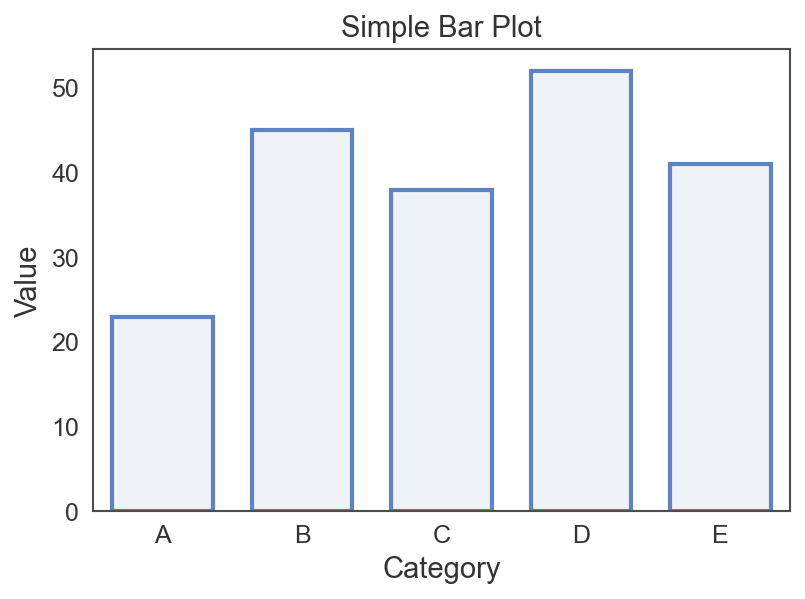

In [6]:
# Create sample data
simple_data = pd.DataFrame({
    'category': ['A', 'B', 'C', 'D', 'E'],
    'value': [23, 45, 38, 52, 41]
})

# Create simple bar plot
fig, ax = pp.barplot(
    data=simple_data,
    x='category',
    y='value',
    title='Simple Bar Plot',
    xlabel='Category',
    ylabel='Value',
    palette='pastel_categorical',
)

### 2.2 Bar Plot with Error Bars

Bar plot showing mean ± standard error with multiple measurements per category.

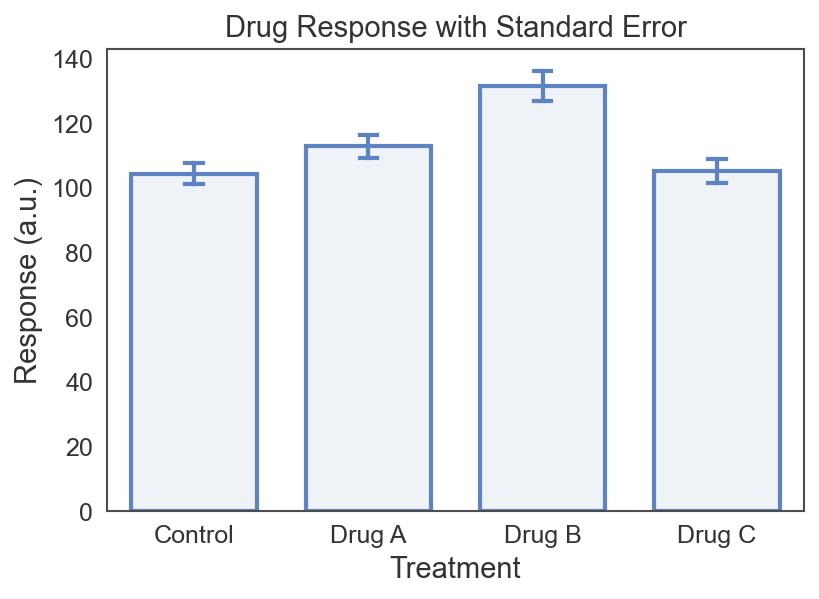

In [7]:
# Create data with multiple measurements per category
np.random.seed(42)
error_data = pd.DataFrame({
    'treatment': np.repeat(['Control', 'Drug A', 'Drug B', 'Drug C'], 12),
    'response': np.concatenate([
        np.random.normal(100, 15, 12),  # Control
        np.random.normal(120, 12, 12),  # Drug A
        np.random.normal(135, 18, 12),  # Drug B
        np.random.normal(110, 14, 12),  # Drug C
    ])
})

# Create bar plot with error bars
fig, ax = pp.barplot(
    data=error_data,
    x='treatment',
    y='response',
    title='Drug Response with Standard Error',
    xlabel='Treatment',
    ylabel='Response (a.u.)',
    errorbar='se',  # standard error
    capsize=0.1, # error bar cap size
    palette='pastel_categorical',
)

### 2.3 Bar Plot with Hue (Color Groups)

Grouped bar plot using the `hue` parameter to split bars by a grouping variable.

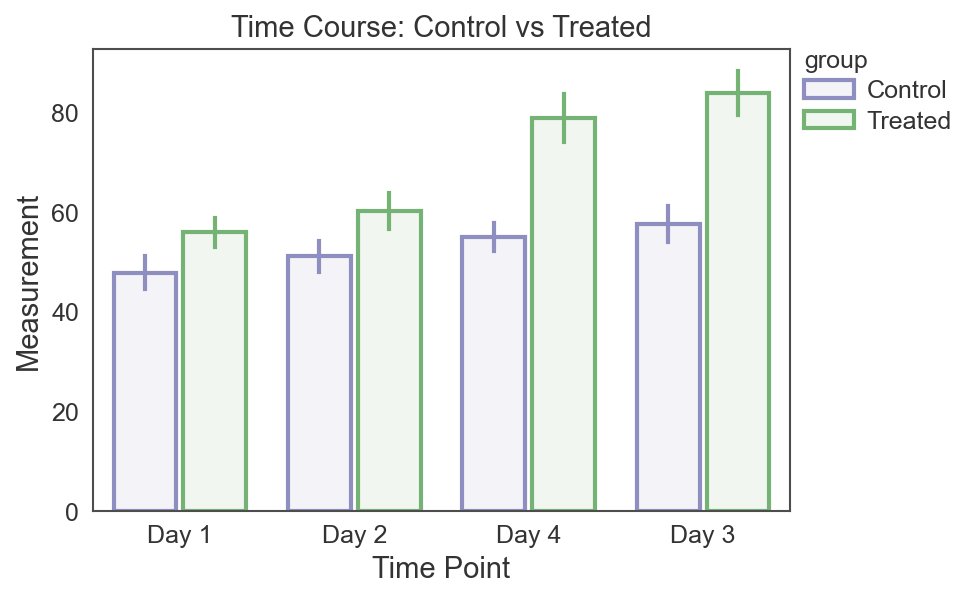

In [8]:
# Create grouped data
np.random.seed(123)
hue_data = pd.DataFrame({
    'time': np.repeat(['Day 1', 'Day 2', 'Day 3', 'Day 4'], 20),
    'group': np.tile(np.repeat(['Control', 'Treated'], 10), 4),
    'measurement': np.concatenate([
        # Day 1
        np.random.normal(50, 8, 10),   # Control
        np.random.normal(52, 8, 10),   # Treated
        # Day 2
        np.random.normal(52, 9, 10),   # Control
        np.random.normal(65, 10, 10),  # Treated
        # Day 3
        np.random.normal(54, 9, 10),   # Control
        np.random.normal(78, 12, 10),  # Treated
        # Day 4
        np.random.normal(55, 10, 10),  # Control
        np.random.normal(85, 14, 10),  # Treated
    ])
})

# Create grouped bar plot with hue
fig, ax = pp.barplot(
    data=hue_data,
    x='time',
    y='measurement',
    hue='group',
    title='Time Course: Control vs Treated',
    xlabel='Time Point',
    ylabel='Measurement',
    errorbar='se',
    palette={'Control': '#8E8EC1', 'Treated': '#75B375'},
)

### 2.4 Bar Plot with Hatch Only

Using hatch patterns without color grouping. When `hatch` matches the x-axis categorical variable, bars are differentiated by patterns.

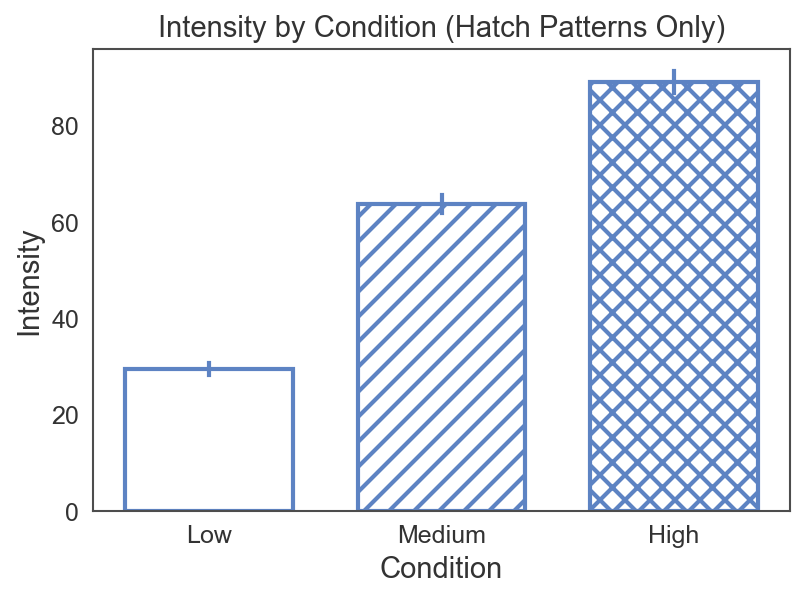

In [9]:
# Create data for hatch-only plot
np.random.seed(456)
hatch_only_data = pd.DataFrame({
    'condition': np.repeat(['Low', 'Medium', 'High'], 15),
    'intensity': np.concatenate([
        np.random.normal(30, 5, 15),
        np.random.normal(60, 8, 15),
        np.random.normal(90, 10, 15),
    ])
})

# Create bar plot with hatch patterns (no hue)
fig, ax = pp.barplot(
    data=hatch_only_data,
    x='condition',
    y='intensity',
    hatch='condition',  # hatch matches x-axis
    title='Intensity by Condition (Hatch Patterns Only)',
    xlabel='Condition',
    ylabel='Intensity',
    errorbar='se',
    color='#5D83C3',  # Single color for all bars
    hatch_mapping={'Low': '', 'Medium': '//', 'High': 'xx'},
    alpha=0.0,
)




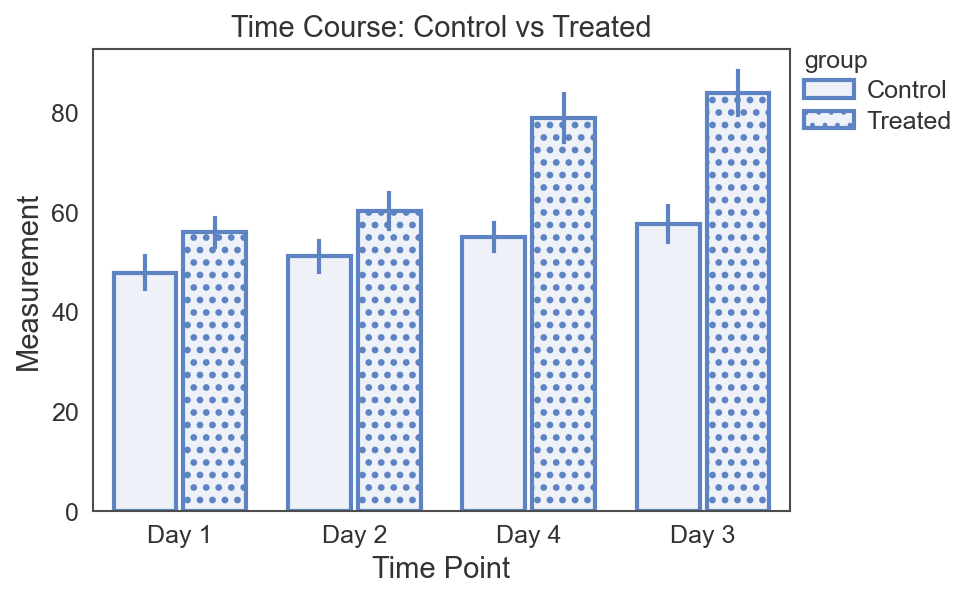

In [10]:
# Create grouped bar plot with hatch
np.random.seed(123)
hatch_data = pd.DataFrame({
    'time': np.repeat(['Day 1', 'Day 2', 'Day 3', 'Day 4'], 20),
    'group': np.tile(np.repeat(['Control', 'Treated'], 10), 4),
    'measurement': np.concatenate([
        # Day 1
        np.random.normal(50, 8, 10),   # Control
        np.random.normal(52, 8, 10),   # Treated
        # Day 2
        np.random.normal(52, 9, 10),   # Control
        np.random.normal(65, 10, 10),  # Treated
        # Day 3
        np.random.normal(54, 9, 10),   # Control
        np.random.normal(78, 12, 10),  # Treated
        # Day 4
        np.random.normal(55, 10, 10),  # Control
        np.random.normal(85, 14, 10),  # Treated
    ])
})

fig, ax = pp.barplot(
    data=hatch_data,
    x='time',
    y='measurement',
    hatch='group',
    title='Time Course: Control vs Treated',
    xlabel='Time Point',
    ylabel='Measurement',
    errorbar='se',
    hatch_mapping={'Control': '', 'Treated': '..'},
)

### 2.5 Bar Plot with Hue + Hatch (Double Split)

Advanced example combining both color grouping (`hue`) and pattern differentiation (`hatch`).

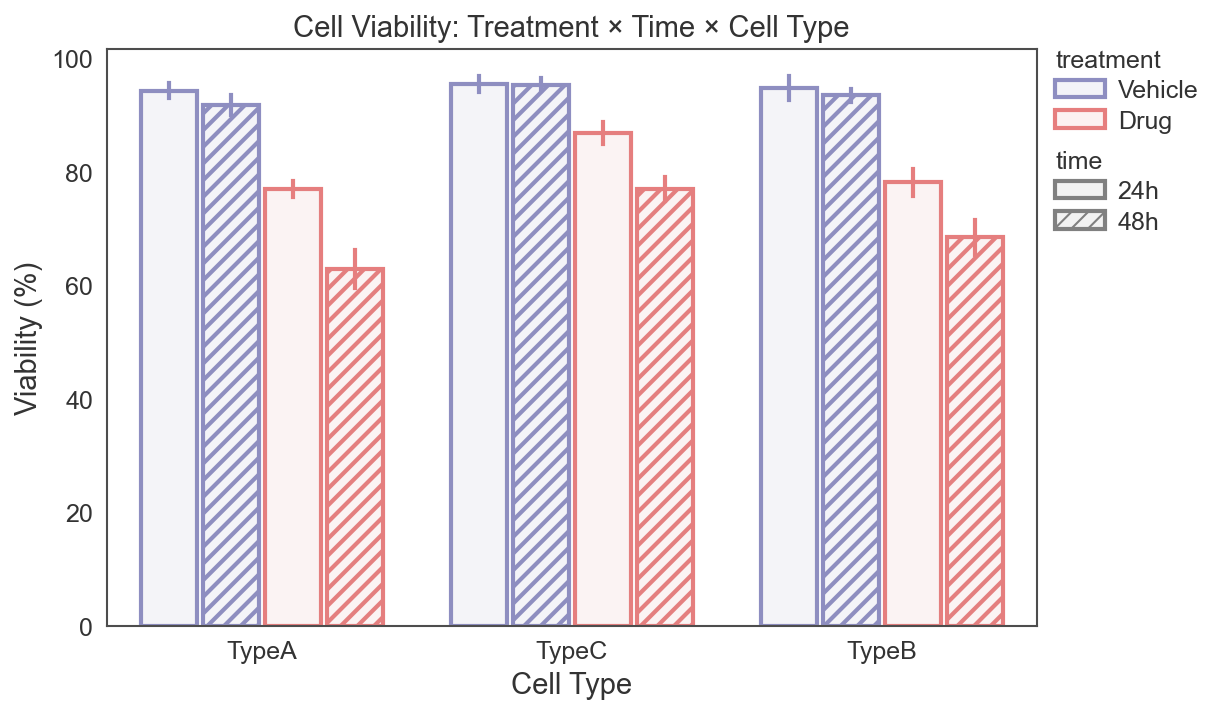

In [11]:
# Create data with both hue and hatch
np.random.seed(789)
double_split_data = pd.DataFrame({
    "cell_type": np.repeat(["TypeA", "TypeB", "TypeC"], 40),
    "treatment": np.tile(np.repeat(["Vehicle", "Drug"], 20), 3),
    "time": np.tile(np.repeat(["24h", "48h"], 10), 6),
    "viability": np.concatenate([
        # TypeA
        np.random.normal(95, 5, 10),   # Vehicle, 24h
        np.random.normal(93, 5, 10),   # Vehicle, 48h
        np.random.normal(75, 8, 10),   # Drug, 24h
        np.random.normal(60, 10, 10),  # Drug, 48h
        # TypeB
        np.random.normal(94, 5, 10),   # Vehicle, 24h
        np.random.normal(92, 5, 10),   # Vehicle, 48h
        np.random.normal(80, 8, 10),   # Drug, 24h
        np.random.normal(70, 9, 10),   # Drug, 48h
        # TypeC
        np.random.normal(96, 4, 10),   # Vehicle, 24h
        np.random.normal(95, 4, 10),   # Vehicle, 48h
        np.random.normal(85, 7, 10),   # Drug, 24h
        np.random.normal(78, 8, 10),   # Drug, 48h
    ])
})

# Create bar plot with both hue and hatch
fig, ax = pp.barplot(
    data=double_split_data,
    x="cell_type",
    y="viability",
    hue="treatment",
    hatch="time",
    title="Cell Viability: Treatment × Time × Cell Type",
    xlabel="Cell Type",
    ylabel="Viability (%)",
    errorbar="se",
    palette={"Vehicle": "#8E8EC1", "Drug": "#E67E7E"},
    hatch_mapping={"24h": "", "48h": "///"},
    figsize=(8, 5)
)

### 2.6 Horizontal Bar Plot

Create horizontal bars by swapping x and y axes.

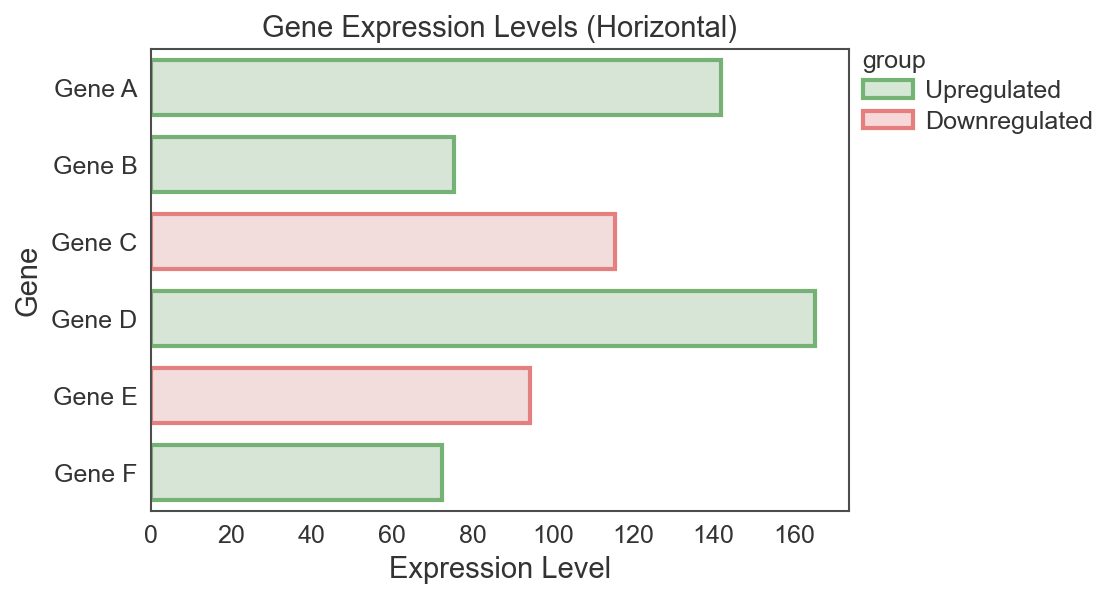

In [12]:
# Create data for horizontal bar plot
np.random.seed(111)
horizontal_data = pd.DataFrame({
    'gene': ['Gene A', 'Gene B', 'Gene C', 'Gene D', 'Gene E', 'Gene F'],
    'expression': np.random.uniform(50, 200, 6),
    'group': ['Upregulated', 'Upregulated', 'Downregulated', 
              'Upregulated', 'Downregulated', 'Upregulated']
})

# Create horizontal bar plot (y is categorical, x is continuous)
fig, ax = pp.barplot(
    data=horizontal_data,
    x='expression',
    y='gene',
    hue='group',
    title='Gene Expression Levels (Horizontal)',
    xlabel='Expression Level',
    ylabel='Gene',
    palette={'Upregulated': '#75B375', 'Downregulated': '#E67E7E'},
    errorbar=None,
    alpha=0.3,
    order=horizontal_data['gene'].tolist()
)

### 2.7 Bar Plot with Custom Colors

Using custom color palettes and single colors.

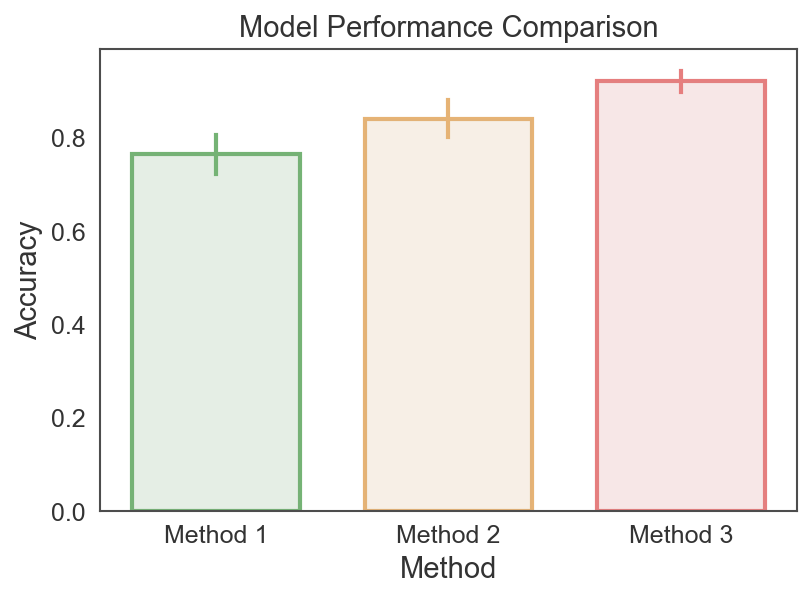

In [13]:
# Create comparison data
np.random.seed(222)
custom_color_data = pd.DataFrame({
    'method': np.repeat(['Method 1', 'Method 2', 'Method 3'], 12),
    'accuracy': np.concatenate([
        np.random.normal(0.75, 0.05, 12),
        np.random.normal(0.85, 0.04, 12),
        np.random.normal(0.92, 0.03, 12),
    ])
})

# Create bar plot with custom colors
fig, ax = pp.barplot(
    data=custom_color_data,
    x='method',
    y='accuracy',
    hue='method',
    title='Model Performance Comparison',
    xlabel='Method',
    ylabel='Accuracy',
    errorbar='sd',  # standard deviation
    palette=["#75b375", "#e6b375", "#e67e7e"],
    alpha=0.2,
)




---

## 3. Hatch Pattern Modes

PubliPlots supports three hatch pattern density modes:
- **Mode 1** (default): Sparse patterns (base × 3, e.g., `'///'`)
- **Mode 2**: Medium density (base × 6, e.g., `'//////'`)
- **Mode 3**: Dense patterns (base × 9, e.g., `'/////////'`)

### 3.1 Comparing Hatch Modes

Visual comparison of different hatch modes.

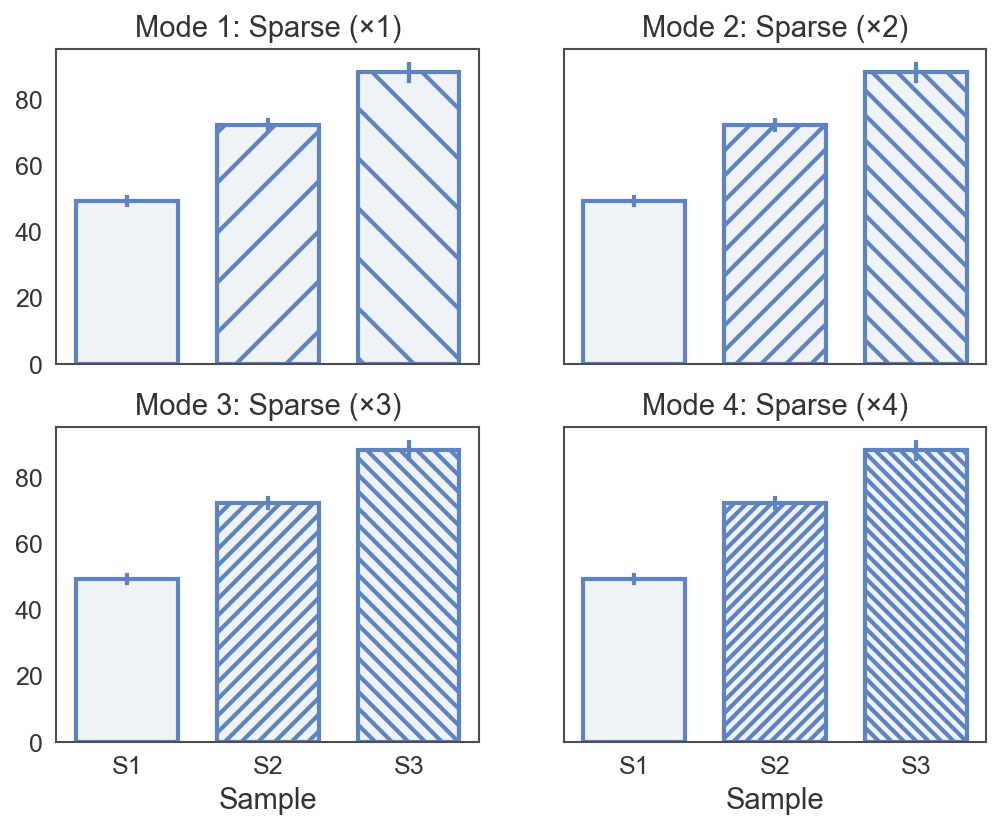

In [14]:
# Create sample data
np.random.seed(333)
hatch_mode_data = pd.DataFrame({
    'sample': np.repeat(['S1', 'S2', 'S3'], 10),
    'value': np.concatenate([
        np.random.normal(50, 5, 10),
        np.random.normal(70, 6, 10),
        np.random.normal(90, 7, 10),
    ])
})

# Create figure with 3 subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True)
kwargs = dict(
    data=hatch_mode_data,
    x='sample',
    y='value',
    hatch='sample',
    xlabel='Sample',
    ylabel='',
    color='#5D83C3',
    errorbar='se',
)
# Mode 1 (sparse)
pp.set_hatch_mode(1)
pp.barplot(
    **kwargs,
    title=f'Mode {pp.get_hatch_mode()}: Sparse (×{pp.get_hatch_mode()})',
    ax=axes[0, 0]
)

# Mode 2 (medium)
pp.set_hatch_mode(2)
pp.barplot(
    **kwargs,
    title=f'Mode {pp.get_hatch_mode()}: Sparse (×{pp.get_hatch_mode()})',
    ax=axes[0, 1]
)

# Mode 3 (dense)
pp.set_hatch_mode(3)
pp.barplot(
    **kwargs,
    title=f'Mode {pp.get_hatch_mode()}: Sparse (×{pp.get_hatch_mode()})',
    ax=axes[1, 0]
)

# Mode 4 (very dense)
pp.set_hatch_mode(4)
pp.barplot(
    **kwargs,
    title=f'Mode {pp.get_hatch_mode()}: Sparse (×{pp.get_hatch_mode()})',
    ax=axes[1, 1]
)
# Reset to default
pp.set_hatch_mode()

### 3.2 Setting Global Hatch Mode

Control hatch density globally or per-function.

In [15]:
# Set global hatch mode
pp.set_hatch_mode(2)  # Medium density
print(f"Current hatch mode: {pp.get_hatch_mode()}")

# View available patterns
print("\nAvailable patterns for mode 2:")
pp.list_hatch_patterns()

# Reset to default
pp.set_hatch_mode()  # or pp.set_hatch_mode(None)
print(f"\nReset to default mode: {pp.get_hatch_mode()}")

Current hatch mode: 2

Available patterns for mode 2:
Hatch Patterns (Mode 2):
  0: '' (no hatch)
  1: '//'
  2: '\\'
  3: '..'
  4: '||'
  5: '--'
  6: '++'
  7: 'xx'

Reset to default mode: 1


---

## 4. Scatter Plots

The `scatterplot()` function creates scatter plots with support for size and color encoding.

### 4.1 Basic Scatter Plot

Simple scatter plot with continuous data.

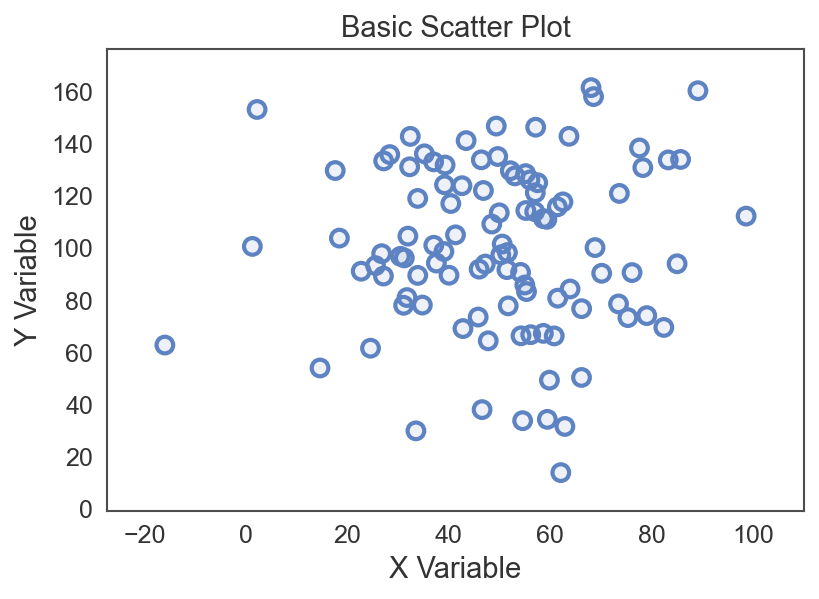

In [16]:
# Create scatter data
np.random.seed(444)
n = 100
scatter_data = pd.DataFrame({
    'x': np.random.normal(50, 20, n),
    'y': np.random.normal(100, 30, n)
})

# Create basic scatter plot
fig, ax = pp.scatterplot(
    data=scatter_data,
    x='x',
    y='y',
    title='Basic Scatter Plot',
    xlabel='X Variable',
    ylabel='Y Variable',
)
ax.margins(x=0.1, y=0.1)

### 4.2 Scatter with Size Encoding

Use point size to encode an additional data dimension.

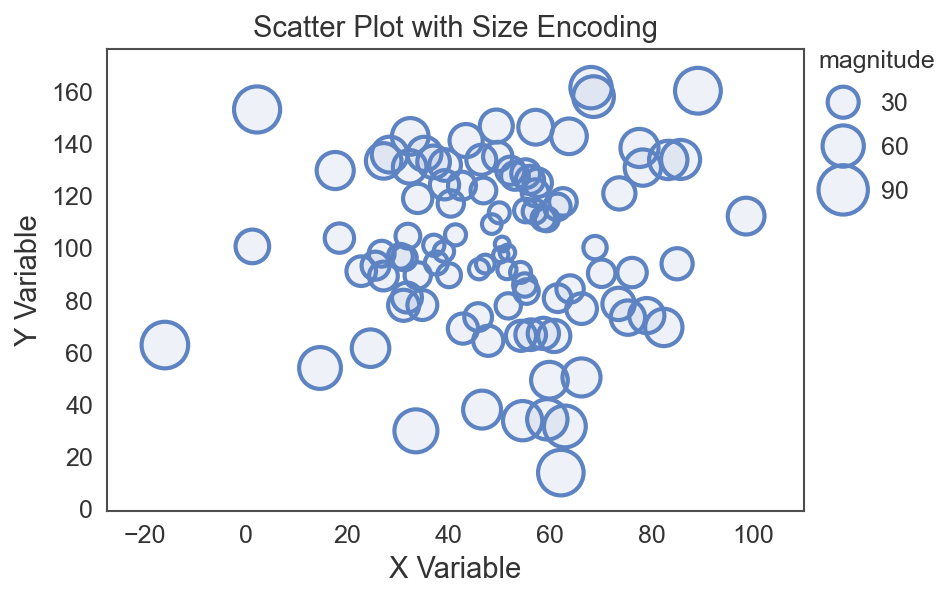

In [17]:
# Add size variable
scatter_data['magnitude'] = np.abs(scatter_data['x'] - 50) + np.abs(scatter_data['y'] - 100)

# Create scatter with size encoding
fig, ax = pp.scatterplot(
    data=scatter_data,
    x='x',
    y='y',
    size='magnitude',
    sizes=(50, 500),
    title='Scatter Plot with Size Encoding',
    xlabel='X Variable',
    ylabel='Y Variable',
)
ax.margins(x=0.1, y=0.1)

### 4.3 Scatter with Categorical Hue

Color points by categorical groups.

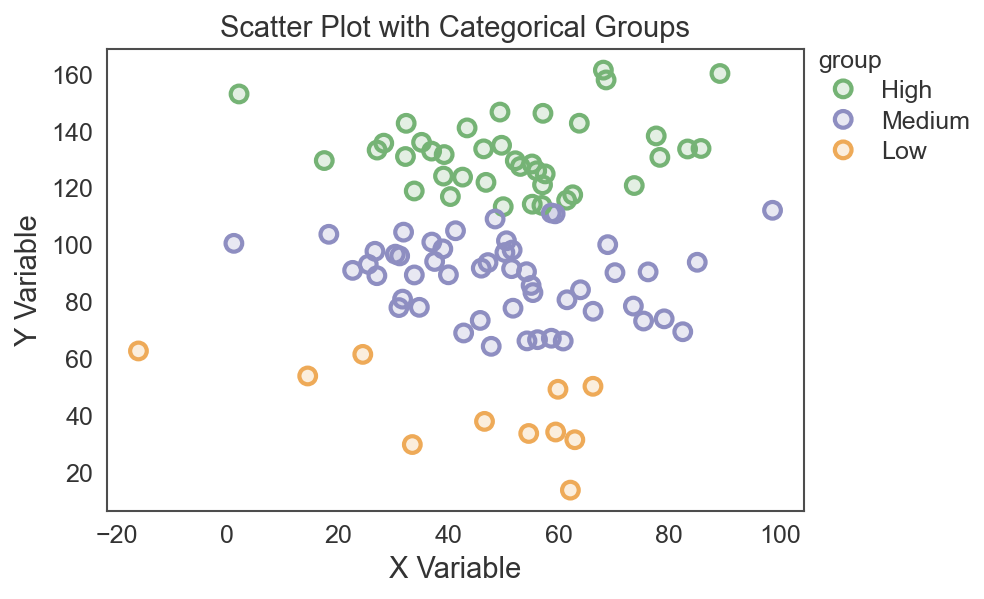

In [18]:
# Add categorical variable
scatter_data['group'] = pd.cut(scatter_data['y'], bins=3, labels=['Low', 'Medium', 'High'])

# Create scatter with categorical hue
fig, ax = pp.scatterplot(
    data=scatter_data,
    x='x',
    y='y',
    hue='group',
    palette='pastel_categorical',
    title='Scatter Plot with Categorical Groups',
    xlabel='X Variable',
    ylabel='Y Variable',
    alpha=0.2,
)

### 4.4 Scatter with Continuous Hue

Use a continuous color scale for hue encoding.

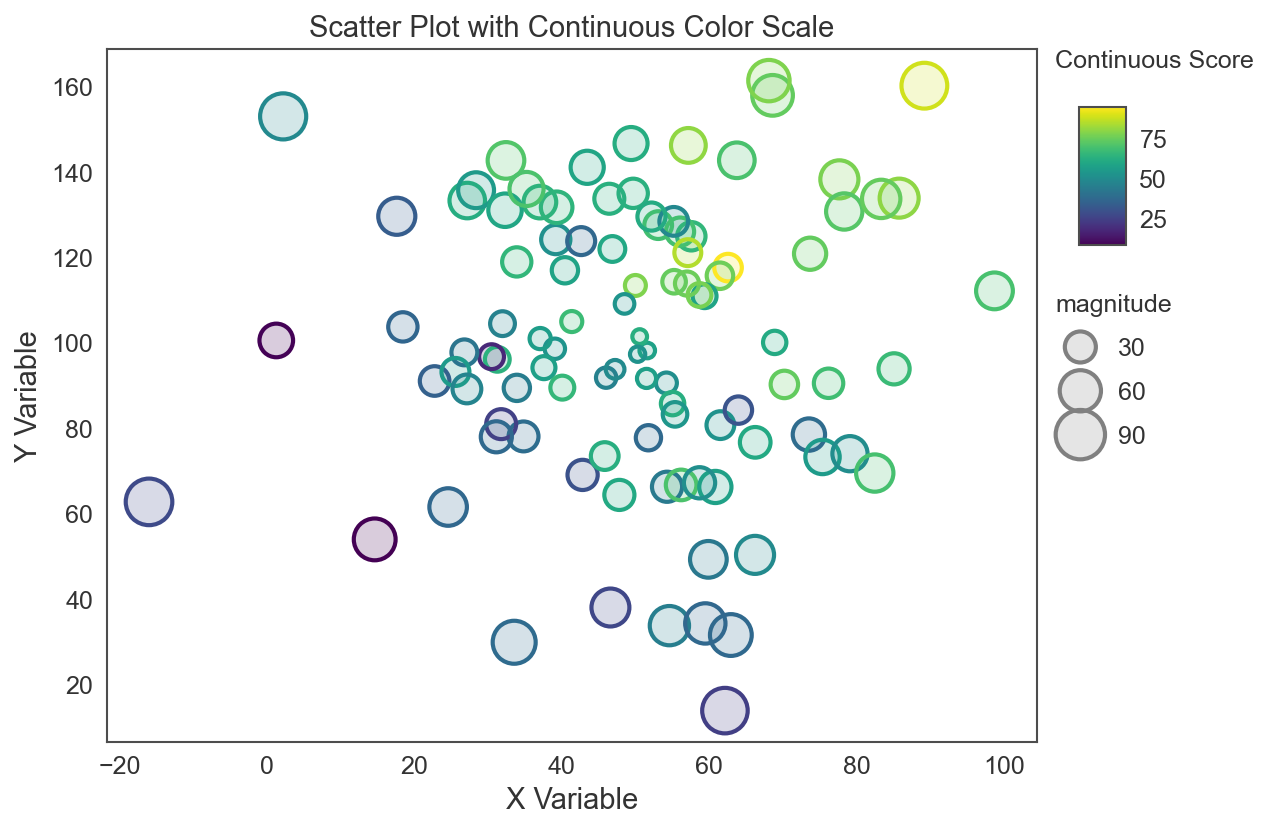

In [19]:
# Add continuous score
scatter_data['score'] = scatter_data['x'] * 0.5 + scatter_data['y'] * 0.3 + np.random.randn(n) * 10

# Create scatter with continuous hue
fig, ax = pp.scatterplot(
    data=scatter_data,
    x='x',
    y='y',
    hue='score',
    size='magnitude',
    palette='viridis',
    hue_norm=(scatter_data['score'].min(), scatter_data['score'].max()),
    title='Scatter Plot with Continuous Color Scale',
    xlabel='X Variable',
    ylabel='Y Variable',
    alpha=0.2,
    figsize=(8, 6),
    legend_kws=dict(
        hue_label="Continuous Score"
    )
)

---

## 5. Bubble Plots

The `bubbleplot()` function creates scatter-based heatmaps with categorical axes.

### 5.1 Basic Circle Heatmap

Create a circle heatmap with categorical axes and color groups.

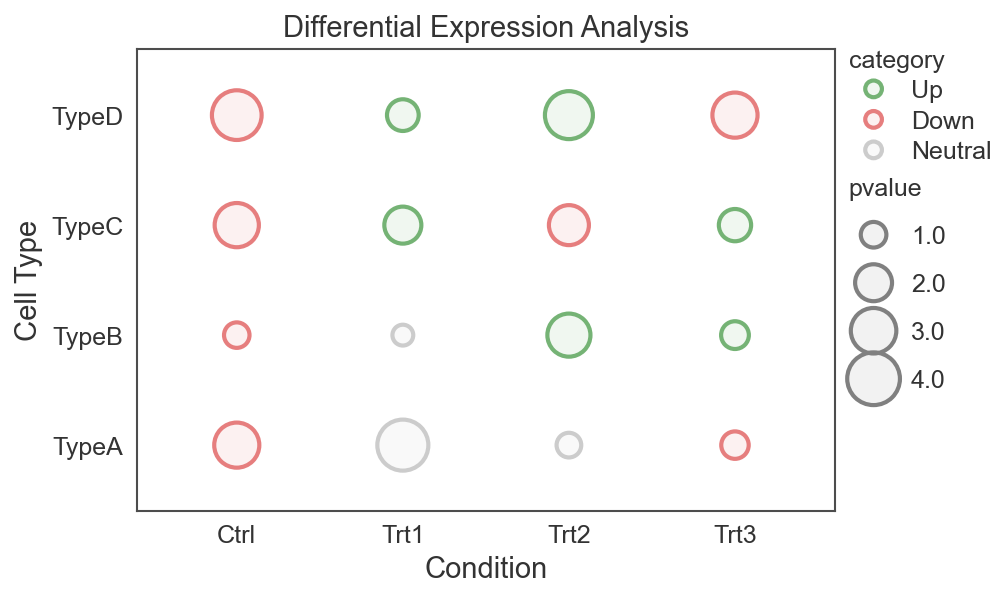

In [20]:
# Create categorical data
np.random.seed(555)
conditions = ['Ctrl', 'Trt1', 'Trt2', 'Trt3']
cell_types = ['TypeA', 'TypeB', 'TypeC', 'TypeD']

heatmap_data = []
for condition in conditions:
    for cell_type in cell_types:
        heatmap_data.append({
            'condition': condition,
            'cell_type': cell_type,
            'pvalue': np.random.uniform(0.5, 5),
            'category': np.random.choice(['Up', 'Down', 'Neutral'])
        })

heatmap_df = pd.DataFrame(heatmap_data)

# Create bubble plot through scatterplot
fig, ax = pp.scatterplot(
    data=heatmap_df,
    x='condition',
    y='cell_type',
    size='pvalue',
    hue='category',
    sizes=(100, 600),
    palette={'Up': '#75B375', 'Down': '#E67E7E', 'Neutral': '#CCCCCC'},
    title='Differential Expression Analysis',
    xlabel='Condition',
    ylabel='Cell Type',
    margins=0.2 # control margin to categorical axis
)

### 5.2 Bubble Plot with Continuous Colors

Use continuous color scale for heatmap values.

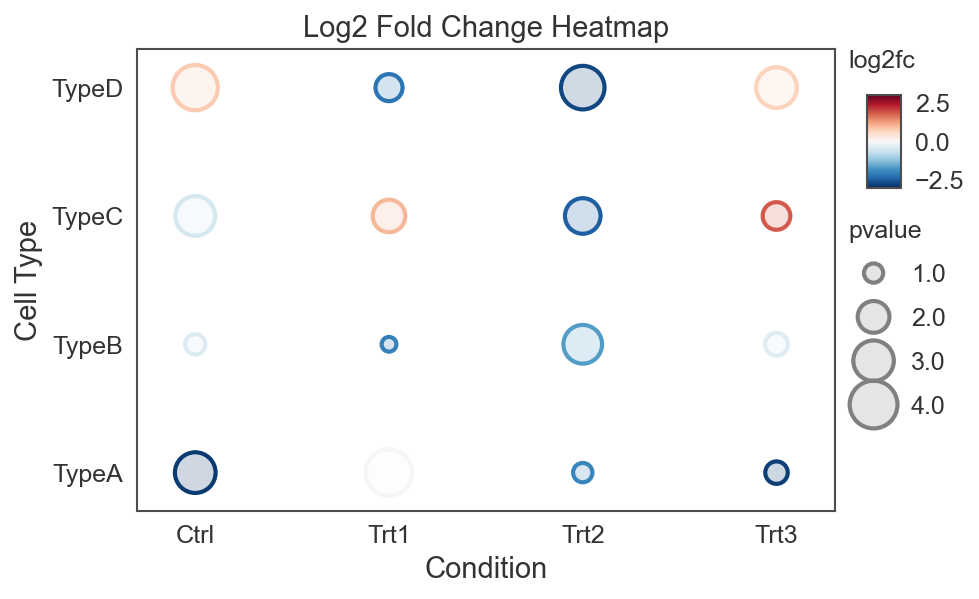

In [21]:
# Add continuous fold change
heatmap_df['log2fc'] = np.random.uniform(-3, 3, len(heatmap_df))

# Create circle heatmap with continuous colors
fig, ax = pp.scatterplot(
    data=heatmap_df,
    x='condition',
    y='cell_type',
    size='pvalue',
    hue='log2fc',
    sizes=(50, 500),
    palette='RdBu_r',  # Diverging colormap
    hue_norm=(-3, 3),
    title='Log2 Fold Change Heatmap',
    xlabel='Condition',
    ylabel='Cell Type',
    alpha=0.2,
)



### 5.3 Large Circle Heatmap

Create a larger heatmap with more categories.

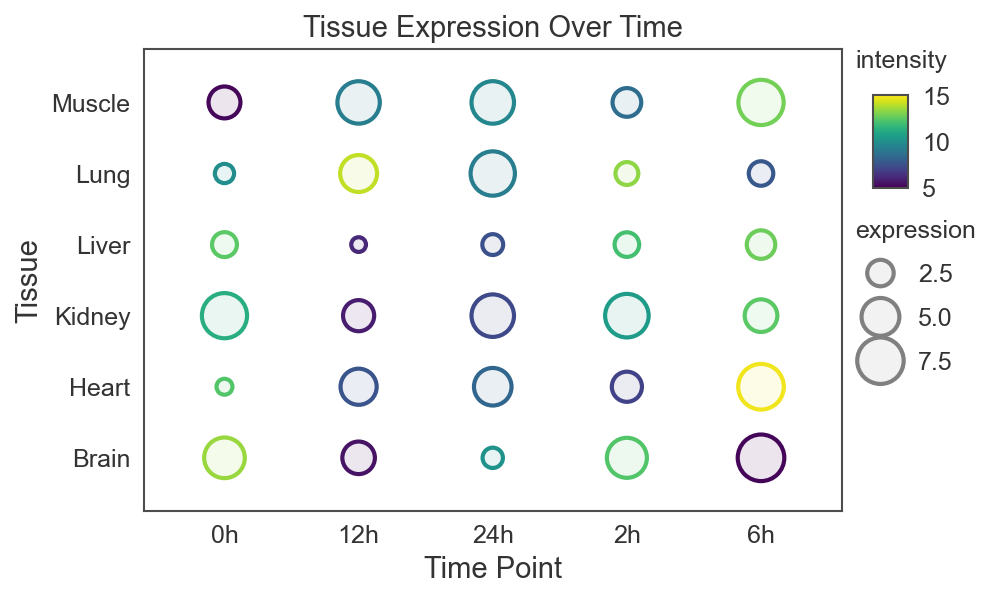

In [22]:
pp.set_notebook_style()
# Create larger dataset
np.random.seed(666)
tissues = ['Brain', 'Liver', 'Heart', 'Kidney', 'Lung', 'Muscle']
timepoints = ['0h', '2h', '6h', '12h', '24h']

large_heatmap_data = []
for tissue in tissues:
    for time in timepoints:
        large_heatmap_data.append({
            'tissue': tissue,
            'time': time,
            'expression': np.random.uniform(1, 10),
            'intensity': np.random.uniform(5, 15)
        })

large_df = pd.DataFrame(large_heatmap_data)

# Create large circle heatmap
fig, ax = pp.scatterplot(
    data=large_df,
    x='time',
    y='tissue',
    size='expression',
    hue='intensity',
    sizes=(50, 500),
    palette='viridis',
    hue_norm=(5, 15),
    title='Tissue Expression Over Time',
    xlabel='Time Point',
    ylabel='Tissue',
    margins=0.15
)

---

## 6. Venn Diagrams

The `venn()` function creates 2-way or 3-way Venn diagrams with optional statistical analysis.

### 6.1 Color and Format Styling

Customize colors and petal label formats. Here we show percentage instead of size for a 2-way Venn diagram.

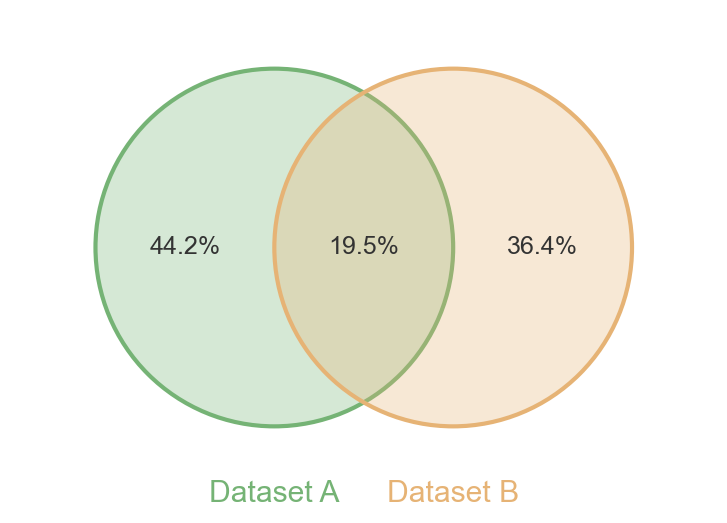

In [23]:
# Create two sets with clear overlap
np.random.seed(777)
set1 = set(np.random.randint(1, 100, 60))  # Random sample of 60 numbers from 1-99
set2 = set(np.random.randint(40, 140, 60)) # Random sample of 60 numbers from 40-139

# Create 2-way Venn with percentage format
fig, ax = pp.venn(
    sets=[set1, set2],
    labels=['Dataset A', 'Dataset B'],
    colors=['#75B375', '#E6B375'],
    fmt='{percentage:.1f}%',  # Show percentage instead of size
    alpha=0.3,
    figsize=(6, 6)
)

### 6.2 2-Way Venn Diagram

Simple 2-way Venn diagram showing set overlaps.

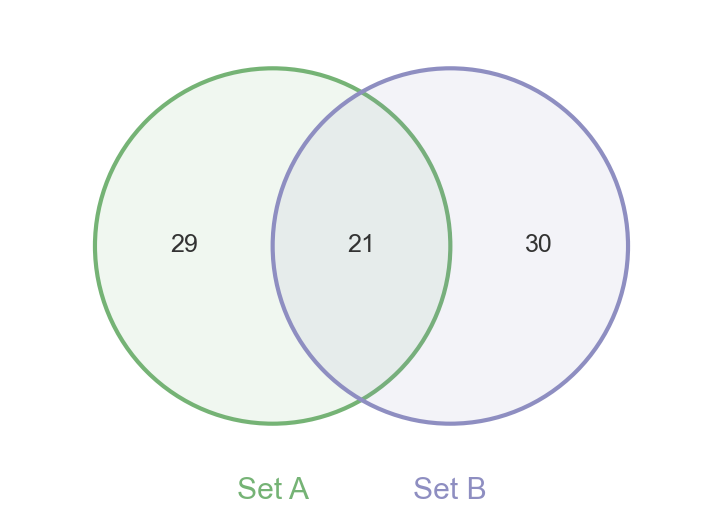

In [24]:
# Create two sets
set1 = set(range(1, 51))    # 1-50
set2 = set(range(30, 81))   # 30-80

# Create 2-way Venn
fig, ax = pp.venn(
    sets=[set1, set2],
    labels=['Set A', 'Set B'],
    colors=pp.get_palette('pastel_categorical', n_colors=2),
)

### 6.3 3-Way Venn Diagram

Three-way Venn diagram showing all pairwise and triple overlaps.

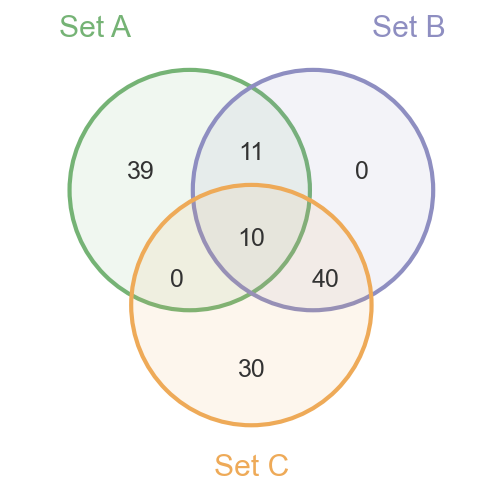

In [25]:
# Create three sets
setA = set(range(1, 61))     # 1-60
setB = set(range(40, 101))   # 40-100
setC = set(range(51, 131))   # 70-130

# Create 3-way Venn
fig, ax = pp.venn(
    sets=[setA, setB, setC],
    labels=['Set A', 'Set B', 'Set C'],
    colors=pp.get_palette('pastel_categorical', n_colors=3),
)

### 6.4 4-Way Venn Diagram

Four-way Venn diagram using ellipses to show all possible intersections.

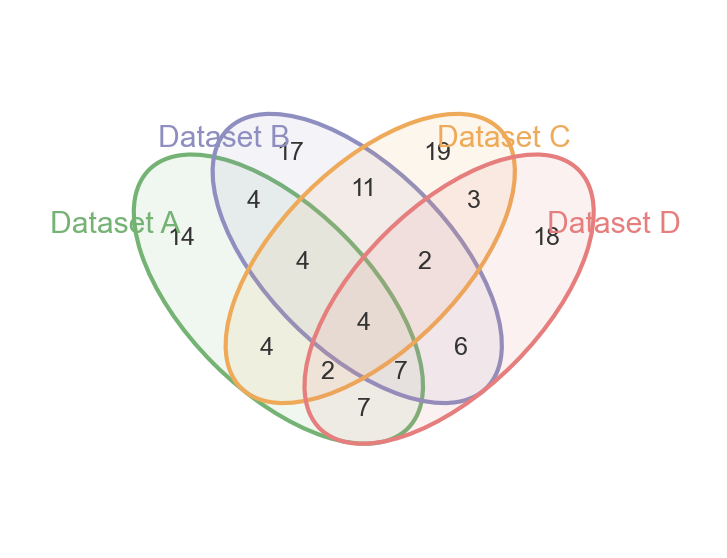

In [26]:
# Create four sets with realistic overlaps
np.random.seed(888)
set1 = set(np.random.randint(1, 120, 70))   # 70 random numbers from 1-119
set2 = set(np.random.randint(30, 150, 75))  # 75 random numbers from 30-149
set3 = set(np.random.randint(60, 180, 70))  # 70 random numbers from 60-179
set4 = set(np.random.randint(1, 100, 65))   # 65 random numbers from 1-99

# Create 4-way Venn
fig, ax = pp.venn(
    sets=[set1, set2, set3, set4],
    labels=['Dataset A', 'Dataset B', 'Dataset C', 'Dataset D'],
    colors=pp.get_palette('pastel_categorical', n_colors=4),
    figsize=(6, 6),
)

### 6.5 5-Way Venn Diagram

Five-way Venn diagram showing complex overlaps between multiple sets.

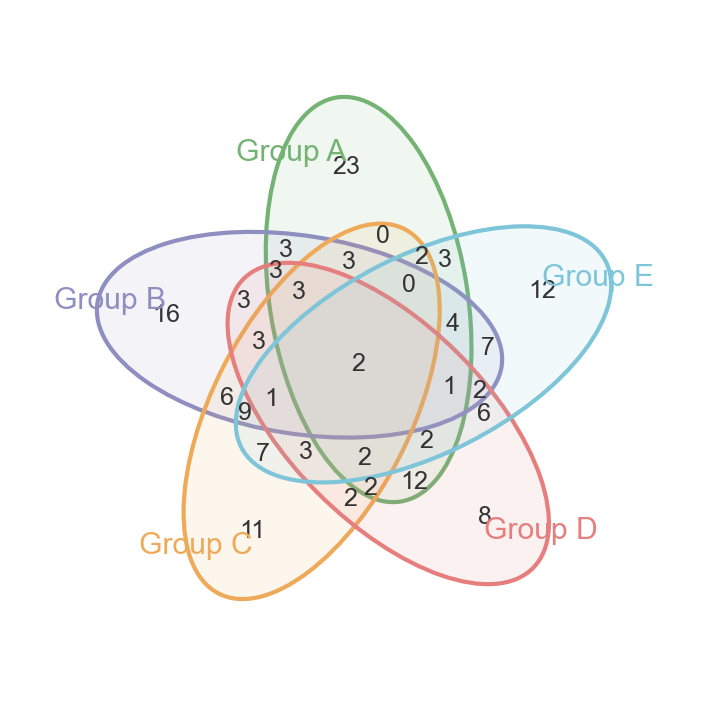

In [27]:
# Create five sets with varying overlaps
np.random.seed(999)
set1 = set(np.random.randint(1, 140, 80))   # 80 random numbers from 1-139
set2 = set(np.random.randint(40, 180, 85))  # 85 random numbers from 40-179
set3 = set(np.random.randint(80, 200, 75))  # 75 random numbers from 80-199
set4 = set(np.random.randint(20, 160, 70))  # 70 random numbers from 20-159
set5 = set(np.random.randint(60, 180, 80))  # 80 random numbers from 60-179

# Create 5-way Venn
fig, ax = pp.venn(
    sets=[set1, set2, set3, set4, set5],
    labels=['Group A', 'Group B', 'Group C', 'Group D', 'Group E'],
    colors=pp.get_palette('pastel_categorical', n_colors=5),
    figsize=(6, 6),
)

---

## 7. UpSet Plots

### 7.1 Basic UpSet Plot

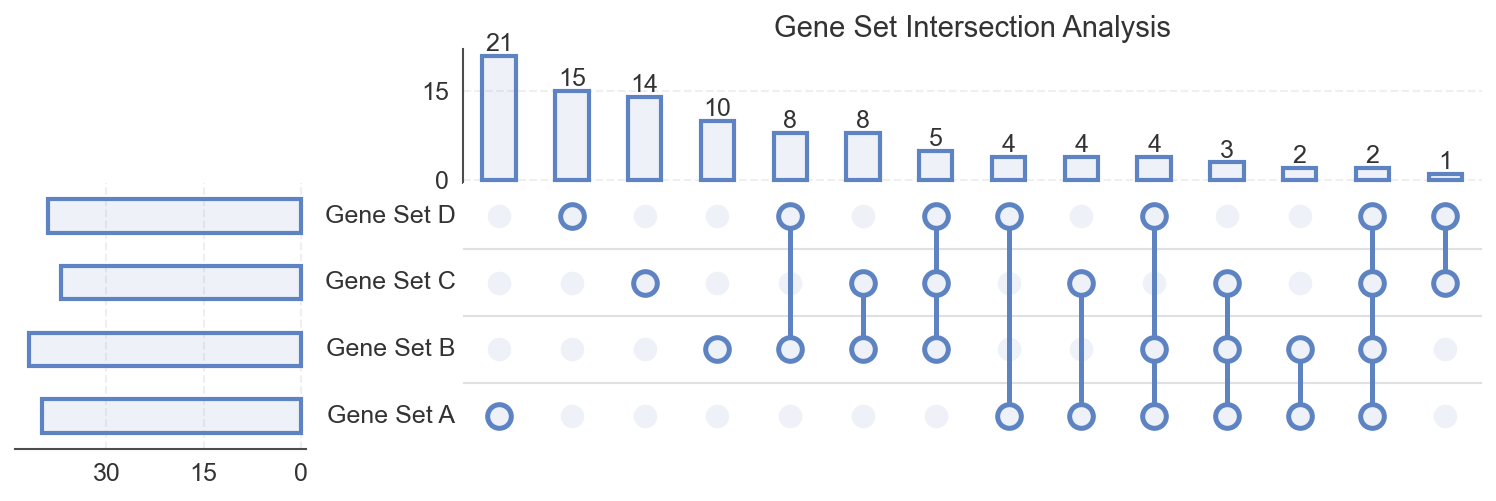

In [28]:
# Create sample sets with meaningful overlaps
np.random.seed(100)
upset_sets = {
    'Gene Set A': set(np.random.randint(1, 100, 50)),
    'Gene Set B': set(np.random.randint(30, 130, 55)),
    'Gene Set C': set(np.random.randint(60, 140, 45)),
    'Gene Set D': set(np.random.randint(20, 110, 48))
}

# Create basic UpSet plot
fig, axes = pp.upsetplot(
    data=upset_sets,
    title='Gene Set Intersection Analysis',
    show_counts=15,
)

### 7.2 UpSet Plot with Custom Colors

Customize the color and transparency of bars to match your publication style.

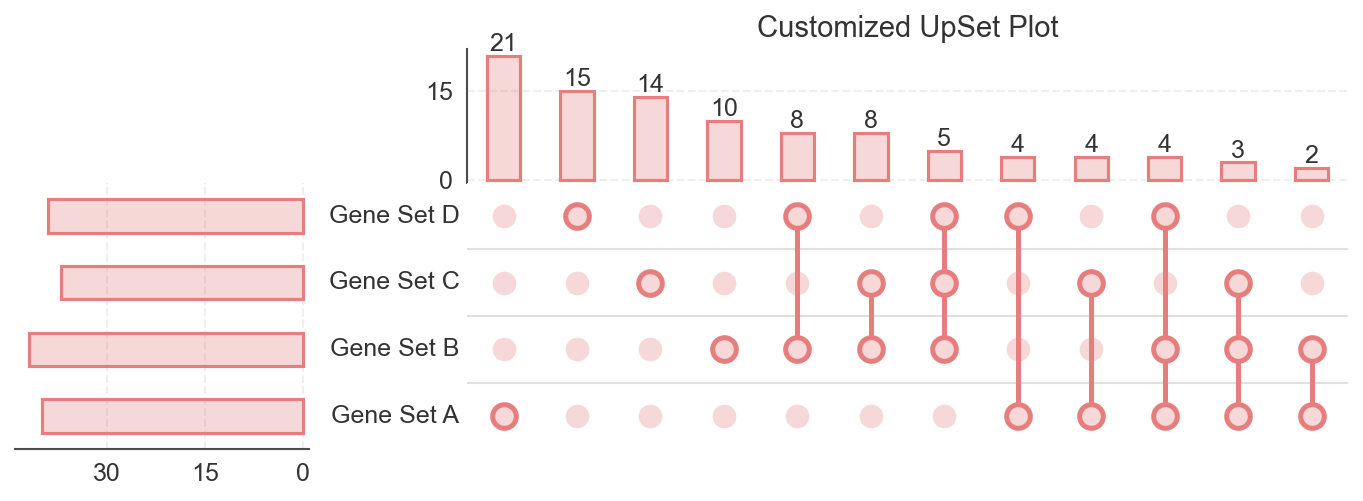

In [29]:
# Use the same sets from previous example
# Create UpSet plot with custom colors and styling
fig, axes = pp.upsetplot(
    data=upset_sets,
    sort_by='size',  # Sort by intersection size (largest first)
    title='Customized UpSet Plot',
    color='#E67E7E',  # Custom red color
    alpha=0.3,  # Increased transparency
    bar_linewidth=1.5,
    show_counts=12,
)

### 7.3 UpSet Plot with Many Sets

UpSet plots excel at showing intersections between many sets, where Venn diagrams become impractical.

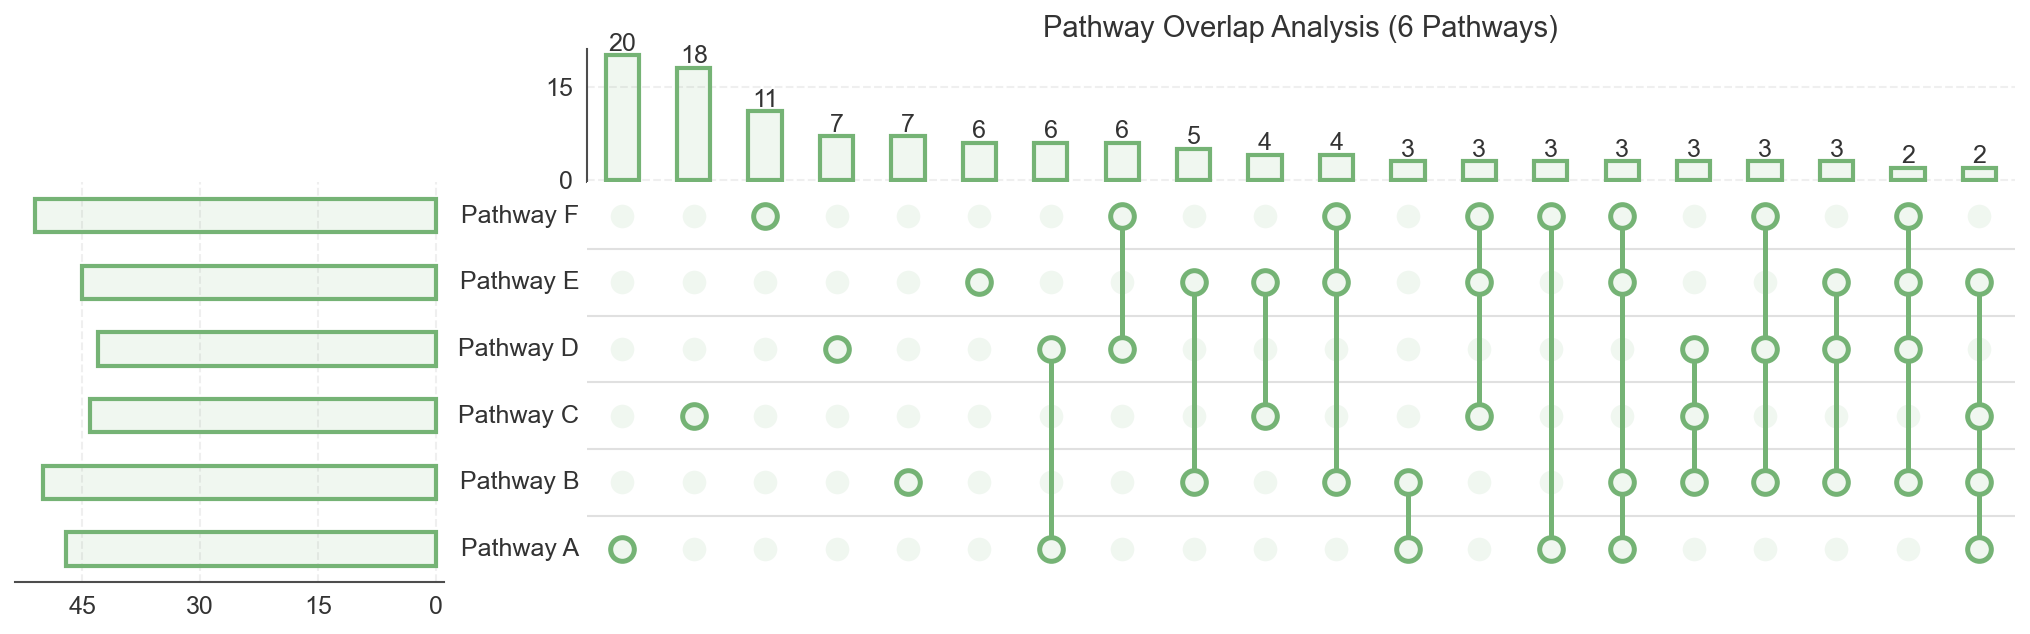

In [30]:
# Create 6 sets with various overlaps
np.random.seed(200)
many_sets = {
    'Pathway A': set(np.random.randint(1, 120, 60)),
    'Pathway B': set(np.random.randint(40, 160, 65)),
    'Pathway C': set(np.random.randint(80, 180, 55)),
    'Pathway D': set(np.random.randint(20, 140, 58)),
    'Pathway E': set(np.random.randint(60, 160, 62)),
    'Pathway F': set(np.random.randint(30, 150, 60))
}

# Create UpSet plot with many sets
fig, axes = pp.upsetplot(
    data=many_sets,
    sort_by='size',
    title='Pathway Overlap Analysis (6 Pathways)',
    color='#75B375',  # Green color
    show_counts=20,
)

### 7.4 UpSet Plot from DataFrame

Create an UpSet plot from a binary membership DataFrame, useful when working with tabular data.

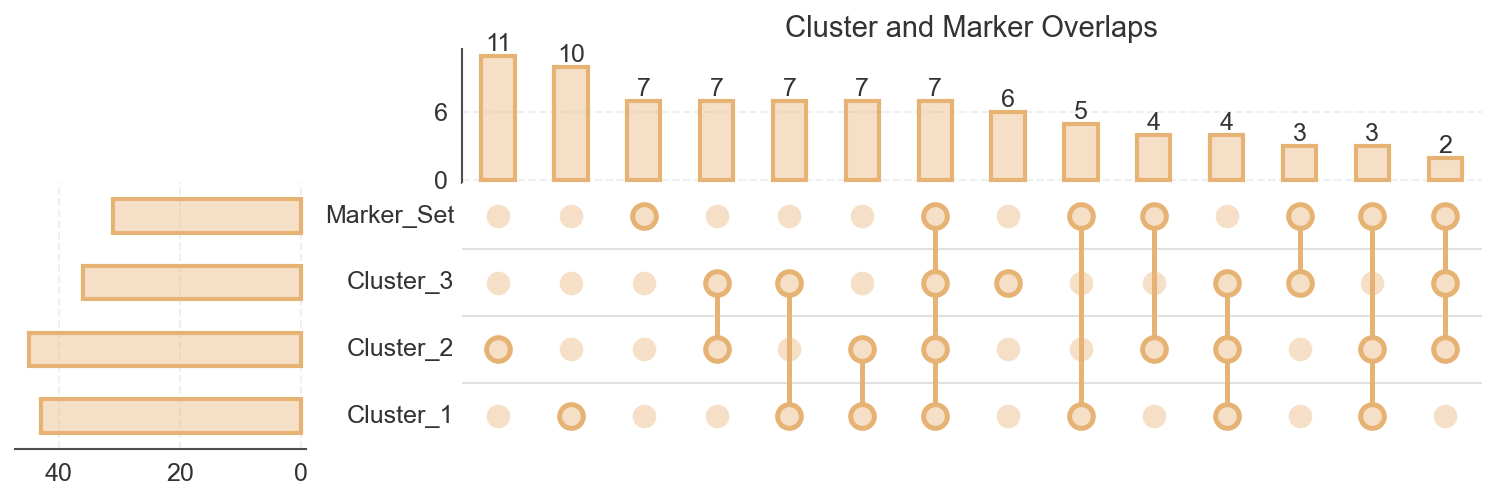

In [31]:
# Create binary membership DataFrame
# Rows are elements, columns are sets, values are 0/1 indicating membership
np.random.seed(300)
n_elements = 100
upset_df = pd.DataFrame({
    'Cluster_1': np.random.choice([0, 1], n_elements, p=[0.6, 0.4]),
    'Cluster_2': np.random.choice([0, 1], n_elements, p=[0.5, 0.5]),
    'Cluster_3': np.random.choice([0, 1], n_elements, p=[0.7, 0.3]),
    'Marker_Set': np.random.choice([0, 1], n_elements, p=[0.65, 0.35]),
})

# Create UpSet plot from DataFrame
fig, axes = pp.upsetplot(
    data=upset_df,
    sort_by='size',
    title='Cluster and Marker Overlaps',
    color='#E6B375',  # Orange color
    alpha=0.4,
    show_counts=15,
)

---

## 8. Configuration with pp.rcParams

PubliPlots seamlessly integrates with matplotlib's configuration system through `pp.rcParams`, providing a unified interface for both matplotlib and publiplots-specific parameters.

### 8.1 Understanding rcParams

`pp.rcParams` is a unified interface for accessing and modifying both:
- **Matplotlib parameters**: Standard matplotlib rcParams like `figure.figsize`, `lines.linewidth`, `font.size`, etc.
- **PubliPlots custom parameters**: PubliPlots-specific parameters like `color`, `alpha`, `capsize`, `palette`, and `hatch_mode`

This integration allows you to use the same familiar syntax for all configuration, just like seaborn.

### 8.2 Setting Global Styles

PubliPlots provides two pre-configured styles optimized for different use cases:

### 8.3 Customizing Individual Parameters

You can customize any parameter by setting it directly through `pp.rcParams`:

### 8.4 Working with Matplotlib Parameters

Since `pp.rcParams` is fully integrated with matplotlib, you can still use `plt.rcParams` directly. Both interfaces access the same underlying configuration:

In [3]:
# Customize PubliPlots-specific parameters
pp.rcParams['color'] = '#E67E7E'  # Change default color to red
pp.rcParams['alpha'] = 0.3        # Increase default transparency
pp.rcParams['capsize'] = 0.15     # Larger error bar caps
pp.rcParams['hatch_mode'] = 2     # Medium density hatch patterns

# Customize matplotlib parameters
pp.rcParams['figure.figsize'] = (8, 6)  # Larger figures
pp.rcParams['lines.linewidth'] = 2.0    # Thicker lines
pp.rcParams['font.size'] = 12           # Larger font
pp.rcParams['axes.grid'] = True         # Enable grid

# Verify changes
print("Customized Parameters:")
print(f"  Color: {pp.rcParams['color']}")
print(f"  Alpha: {pp.rcParams['alpha']}")
print(f"  Figure size: {pp.rcParams['figure.figsize']}")
print(f"  Line width: {pp.rcParams['lines.linewidth']}")
print(f"  Grid enabled: {pp.rcParams['axes.grid']}")

# Reset to publication style for rest of examples
pp.set_notebook_style()

Customized Parameters:
  Color: #E67E7E
  Alpha: 0.3
  Figure size: [8.0, 6.0]
  Line width: 2.0
  Grid enabled: True


In [4]:
# Notebook style: larger figures, bigger fonts for interactive work
pp.set_notebook_style()
print("Notebook Style:")
print(f"  Figure size: {pp.rcParams['figure.figsize']}")
print(f"  Font size: {pp.rcParams['font.size']}")
print(f"  Save DPI: {pp.rcParams['savefig.dpi']}")

print()

# Publication style: compact figures, smaller fonts for final manuscripts
pp.set_notebook_style()
print("Publication Style:")
print(f"  Figure size: {pp.rcParams['figure.figsize']}")
print(f"  Font size: {pp.rcParams['font.size']}")
print(f"  Save DPI: {pp.rcParams['savefig.dpi']}")

# Tip: Use notebook_style for exploratory analysis, then switch to 
# publication_style when preparing figures for papers

Notebook Style:
  Figure size: [6.0, 4.0]
  Font size: 12.0
  Save DPI: 300.0

Publication Style:
  Figure size: [6.0, 4.0]
  Font size: 12.0
  Save DPI: 300.0


In [5]:
# Access PubliPlots custom parameters
print("PubliPlots Custom Parameters:")
print(f"  Default color: {pp.rcParams['color']}")
print(f"  Default alpha: {pp.rcParams['alpha']}")
print(f"  Default capsize: {pp.rcParams['capsize']}")
print(f"  Hatch mode: {pp.rcParams['hatch_mode']}")

# Access matplotlib parameters through the same interface
print("\nMatplotlib Parameters (via pp.rcParams):")
print(f"  Figure size: {pp.rcParams['figure.figsize']}")
print(f"  Line width: {pp.rcParams['lines.linewidth']}")
print(f"  Font size: {pp.rcParams['font.size']}")
print(f"  DPI: {pp.rcParams['savefig.dpi']}")

PubliPlots Custom Parameters:
  Default color: #5d83c3
  Default alpha: 0.1
  Default capsize: 0.0
  Hatch mode: 2

Matplotlib Parameters (via pp.rcParams):
  Figure size: [6.0, 4.0]
  Line width: 2.0
  Font size: 12.0
  DPI: 300.0


---

## Summary

This notebook demonstrated:

### Bar Plots
- Simple bar plots
- Bar plots with error bars (SE/SD)
- Grouped bars with `hue` (color groups)
- Hatch-only bars (patterns without color grouping)
- Double-split bars (`hue` + `hatch`)
- Horizontal bar plots
- Custom color palettes

### Hatch Modes
- Three density modes (sparse, medium, dense)
- Global mode setting with `set_hatch_mode()`
- Visual comparison of modes

### Scatter Plots
- Basic scatter plots
- Size encoding
- Categorical hue
- Continuous color scales

### Circle Heatmaps
- Categorical color mapping
- Continuous color scales
- Large heatmaps
- Size and color encoding

### Venn Diagrams
- 2 to 5-way Venn diagrams
- Custom colors and styling
- Percentage formatting

### UpSet Plots
- Basic UpSet plots from dictionaries
- Custom colors and transparency
- Many-set intersections (6+ sets)
- DataFrame-based input

For more information, visit the [PubliPlots GitHub repository](https://github.com/jorgebotas/publiplots).